In [9]:
import pandas as pd

df = pd.read_csv(
    'https://raw.githubusercontent.com/CodersLab/DataLab_intro/main/iterim/BankChurner_ColumnsRenamed.csv',
    sep=';'
    )

In [10]:
df.head()

,Client_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
df["Is_Active"] = 1

is_active = df["Attrition_Flag"] == "Attrited Customer"
df.loc[is_active, "Is_Active"] = 0


In [12]:
df[["Attrition_Flag", "Is_Active"]].drop_duplicates()


,Attrition_Flag,Is_Active
0,Existing Customer,1
21,Attrited Customer,0


In [13]:
df["Income_Category"].unique()


array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [14]:
income_below_40k = df["Income_Category"] == "Less than $40K"
df.loc[income_below_40k, "Income_Category"] = "1. < $40K"

income_below_60k = df["Income_Category"] == "$40K - $60K"
df.loc[income_below_60k, "Income_Category"] = "2. $40K - 60K"

income_below_80k = df["Income_Category"] == "$60K - $80K"
df.loc[income_below_80k, "Income_Category"] = "3. $60K - 80K"

income_below_120k = df["Income_Category"] == "$80K - $120K"
df.loc[income_below_120k, "Income_Category"] = "4. $80K - 120K"

income_above_120k = df["Income_Category"] == "$120K +"
df.loc[income_above_120k, "Income_Category"] = "5. 120K+"

income_unknown = df["Income_Category"] == "Unknown"
df.loc[income_unknown, "Income_Category"] = "6. Unknown"


In [15]:
df["Income_Category"].unique()


array(['3. $60K - 80K', '1. < $40K', '4. $80K - 120K', '2. $40K - 60K',
       '5. 120K+', '6. Unknown'], dtype=object)

In [16]:
uneducated = df["Education_Level"] == "Uneducated"
df.loc[uneducated, "Education_Level"] = "1. Uneducated"

collage = df["Education_Level"] == "College"
df.loc[collage, "Education_Level"] = "2. College"

high_school = df["Education_Level"] == "High School"
df.loc[high_school, "Education_Level"] = "3. High School"

graduate = df["Education_Level"] == "Graduate"
df.loc[graduate, "Education_Level"] = "4. Graduate"

post_graduate = df["Education_Level"] == "Post-Graduate"
df.loc[post_graduate, "Education_Level"] = "5. Post-Graduate"

doctorate = df["Education_Level"] == "Doctorate"
df.loc[doctorate, "Education_Level"] = "6. Doctorate"

unknown = df["Education_Level"] == "Unknown"
df.loc[unknown, "Education_Level"] = "7. Unknown"


In [17]:
df["Education_Level"].unique()


array(['3. High School', '4. Graduate', '1. Uneducated', '7. Unknown',
       '2. College', '5. Post-Graduate', '6. Doctorate'], dtype=object)

In [18]:
blue_cards = df["Card_Category"] == "Blue"
df.loc[blue_cards, "Card_Category"] = "1. Blue"

silver_cards = df["Card_Category"] == "Silver"
df.loc[silver_cards, "Card_Category"] = "2. Silver"

gold_cards = df["Card_Category"] == "Gold"
df.loc[gold_cards, "Card_Category"] = "3. Gold"

platinum_cards = df["Card_Category"] == "Platinum"
df.loc[platinum_cards, "Card_Category"] = "4. Platinum"


In [19]:
df['Card_Category'].unique()

array(['1. Blue', '3. Gold', '2. Silver', '4. Platinum'], dtype=object)

In [20]:
def analyse_column(column_name):
    result = df.\
        groupby(by=[column_name])["Is_Active"].\
        agg([
            "mean",  # określenie średniej
            "count",  # określenie liczebności grupy
            lambda x: sum(1-x),   # liczba kart, które zostały dezaktywowane (0)
            lambda x: sum(1-x)/len(x) - 0.16  # odchylenie od średniej globalnej
        ])

    # nadanie tabeli opisowych nazw kolumn
    # ponieważ po tym kroku były by dostępne następujące:
    # mean, count, <lambda_0>, <lambda_1>
    # które nic nie opisują
    result.columns = [
        "Active_Ratio",
        "Group_Size",
        "Deactivated_Amount",
        "Deviation_From_Global"
    ]
    return result


In [21]:
analyse_column("Client_ID")


,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Client_ID,,,,
708082083,1.0,1,0,-0.16
708083283,0.0,1,1,0.84
708084558,0.0,1,1,0.84
708085458,1.0,1,0,-0.16
708086958,1.0,1,0,-0.16
...,...,...,...,...
828288333,1.0,1,0,-0.16
828291858,0.0,1,1,0.84
828294933,0.0,1,1,0.84


In [22]:
import matplotlib.pyplot as plt

def visualize_analysis(df, compare_value):
    plt.figure(figsize=(15,10))  # określenie wymiaru figury (w calach)

    x = df.index.astype(str)  # wartości na osi x
    y = df["Active_Ratio"]  # wartości na osi y

    plt.bar(x, y)  # określenie typu wykresu, jaki chemy wykreślić – tutaj słupkowy

    # stylowanie wykresu
    plt.xlabel("Group")  # dodanie legendy dla osi x
    plt.ylabel("Active ratio")  # dodanie legendy dla osi y
    plt.title("Active ratio by groups")  # nadanie tytułu dla wykresu

    # dodamy również linię poziomą, do której będziemy mogli odnosić poszczególne grupy
    plt.axhline(compare_value, color="red", linestyle="--")

    plt.show()



In [23]:
gender_analysis = analyse_column("Gender")
gender_analysis


,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Gender,,,,
F,0.826428,5358,930,0.013572
M,0.853848,4769,697,-0.013848


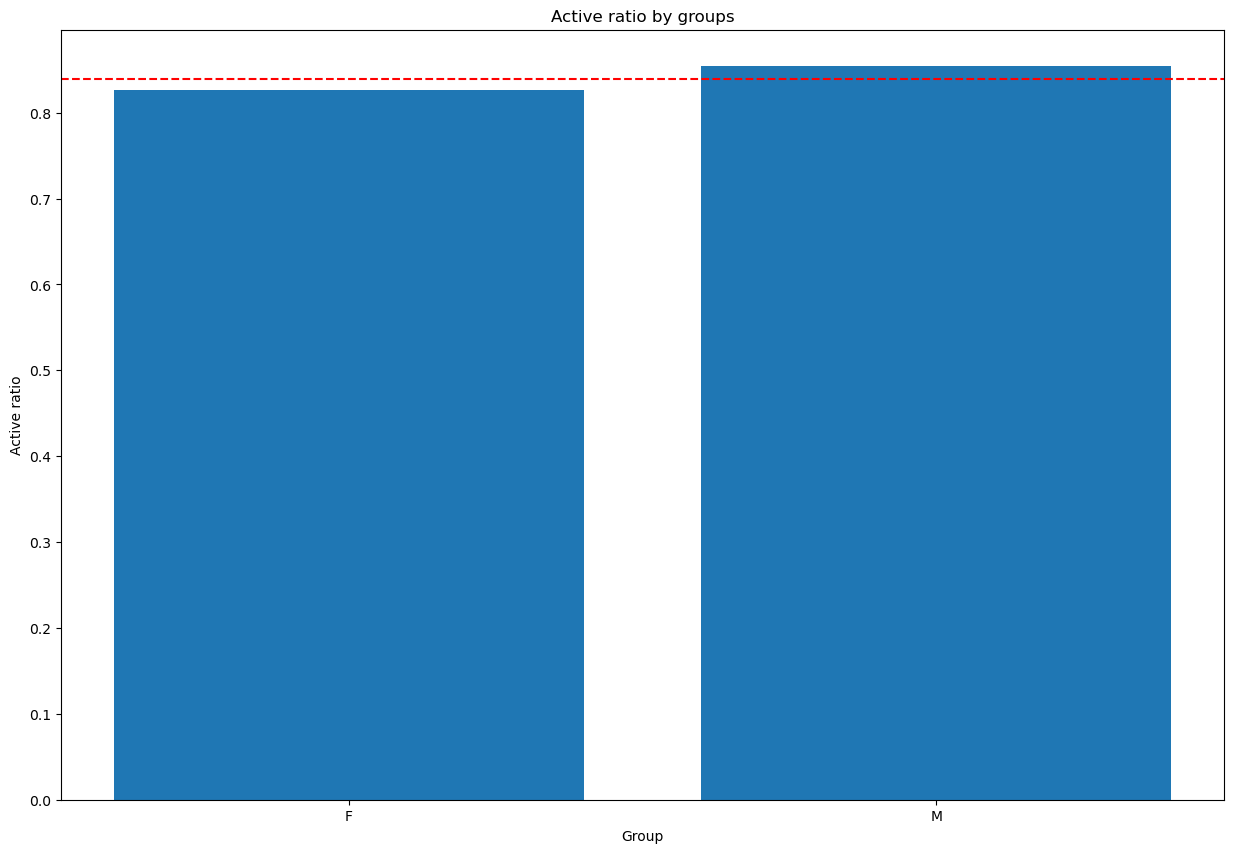

In [24]:
global_mean = df["Is_Active"].mean()  # określenie globalnego poziomu aktywnych kart
visualize_analysis(gender_analysis, global_mean)


In [25]:
education_analysis = analyse_column("Education_Level")
education_analysis


,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Education_Level,,,,
1. Uneducated,0.840619,1487,237,-0.000619
2. College,0.847976,1013,154,-0.007976
3. High School,0.847988,2013,306,-0.007988
4. Graduate,0.844309,3128,487,-0.004309
5. Post-Graduate,0.821705,516,92,0.018295
6. Doctorate,0.789357,451,95,0.050643
7. Unknown,0.831468,1519,256,0.008532


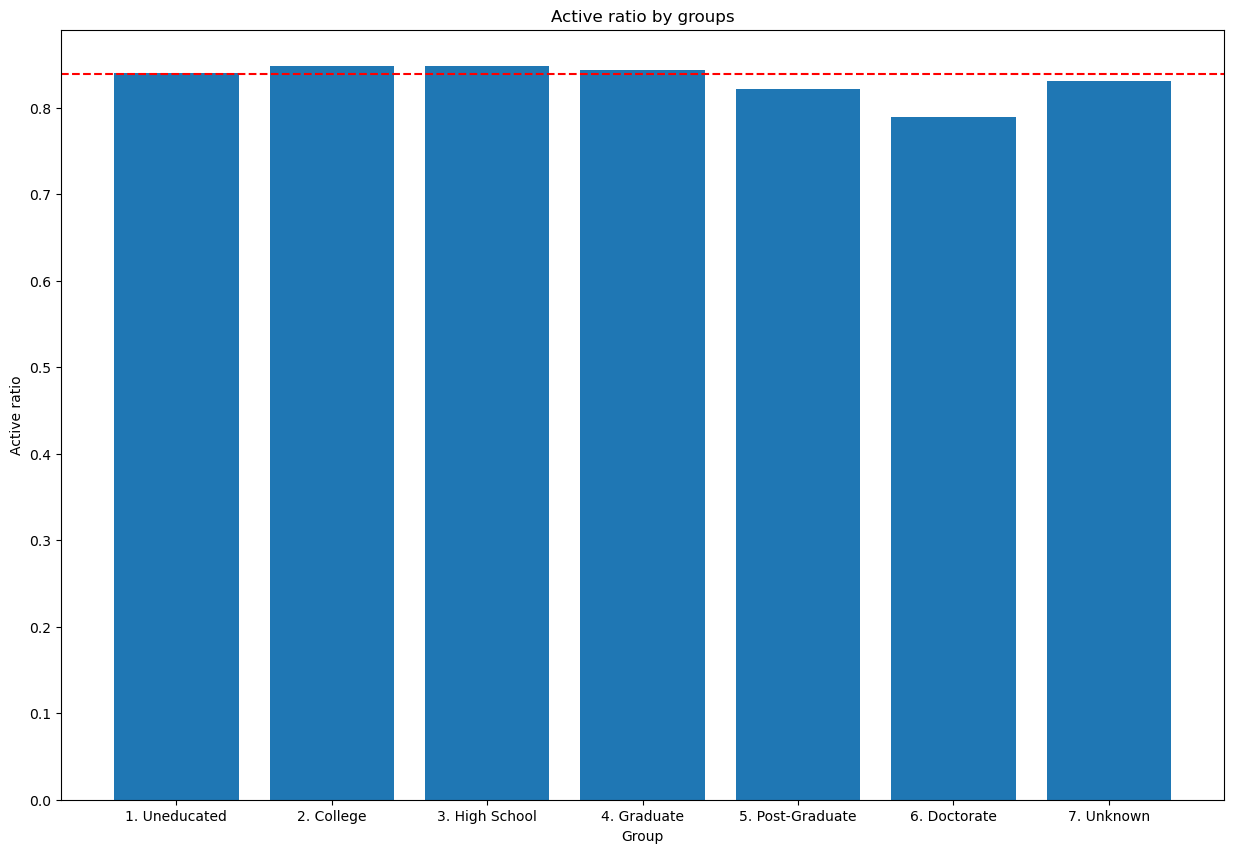

In [26]:
visualize_analysis(education_analysis, global_mean)


In [27]:
income_analysis = analyse_column("Income_Category")
income_analysis


,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Income_Category,,,,
1. < $40K,0.828138,3561,612,0.011862
2. $40K - 60K,0.848603,1790,271,-0.008603
3. $60K - 80K,0.865193,1402,189,-0.025193
4. $80K - 120K,0.842345,1535,242,-0.002345
5. 120K+,0.826685,727,126,0.013315
6. Unknown,0.831835,1112,187,0.008165


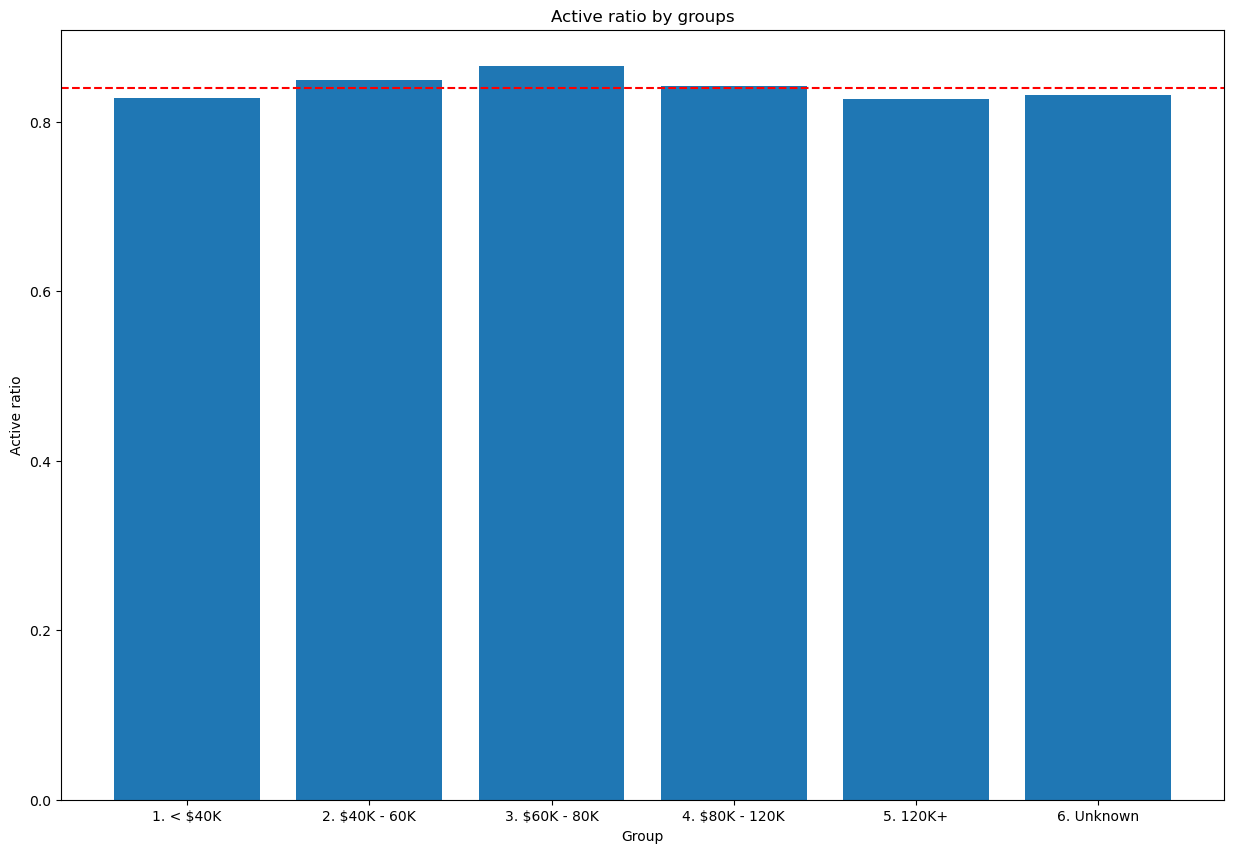

In [28]:
visualize_analysis(income_analysis, global_mean)


In [29]:
df["Years_on_book"] = pd.cut(
    x=df["Months_on_book"]/12,  # zmienna, którą chcemy pogrupować
    bins=[1, 2, 3, 4, 5]  # koszyki, według których dane mają być pogrupowane
    )


In [30]:
months_analysis = analyse_column("Years_on_book")
months_analysis


,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Years_on_book,,,,
"(1, 2]",0.851240,847,126,-0.011240
"(2, 3]",0.839240,5418,871,0.000760
"(3, 4]",0.838167,3207,519,0.001833
"(4, 5]",0.830534,655,111,0.009466


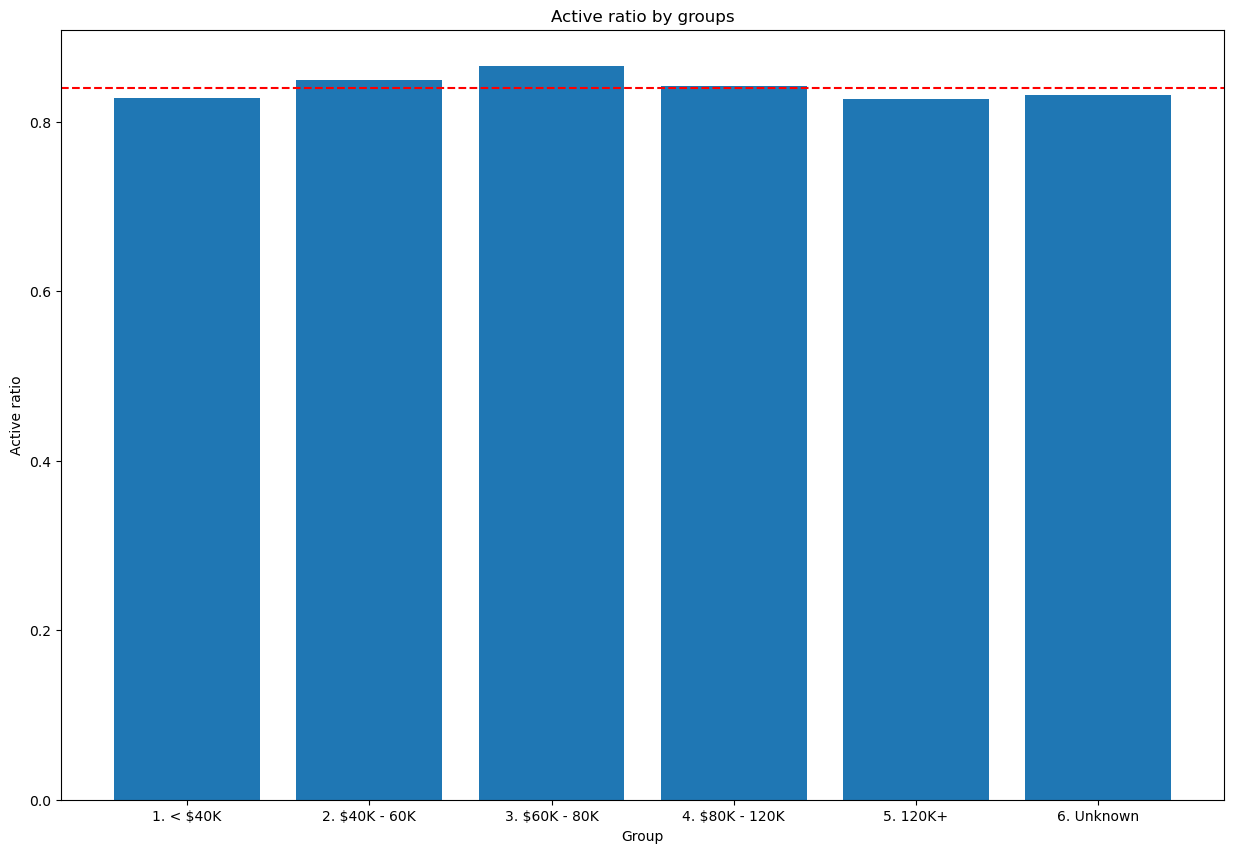

In [32]:
visualize_analysis(income_analysis, global_mean)